In [1]:
from source.util import utils as u
from source import metrics, plots
from source import handshake2, scargc, hs
import sys
import time
import os
import psutil
import resource

In [2]:
poolsize = 150
clusters = 4
n_components = 4
epsilon = 0.1
percent = 30

In [3]:
base = '/home/localuser/Documentos/procopio/tcc/datasets/keystroke.txt'
dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_features = u.criar_datasets(5, base)


Handshake

In [4]:
start = time.time()

predicted, updt = handshake2.handshake2(dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_components, n_features, epsilon, percent)

end = time.time()
mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempo = end - start

SCARGC

In [5]:
startScargc = time.time()

predictedS, updtS = scargc.scargc_1NN(dataset, data_labeled, dataset_train, l_train, stream, l_stream, poolsize, clusters, n_features)

endScargc = time.time()
memS = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempoS = endScargc - startScargc

80


/home/localuser/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [8]:
# acc_percent = metrics.makeBatches(l_stream, predicted, len(stream))
acc_percent = [[0.8        ,1.         ,1.         ,0.71428571 ,0.8        ,0.85714286,0.92857143 ,0.78571429 ,0.78571429 ,0.8        ,0.85714286 ,0.78571429,0.85714286 ,1.         ,0.93333333 ,0.71428571 ,0.78571429 ,0.71428571,0.92857143 ,0.86666667 ,0.78571429 ,0.71428571 ,0.85714286 ,1.  ,0.93333333 ,1.         ,0.92857143 ,0.92857143 ,1.         ,1.  ,0.85714286 ,0.92857143 ,0.92857143 ,0.85714286 ,0.86666667 ,0.71428571  ,0.71428571 ,0.85714286 ,0.92857143 ,0.86666667 ,0.71428571 ,0.71428571 ,0.85714286 ,0.57142857 ,0.8        ,0.85714286 ,0.71428571 ,0.57142857  ,0.85714286 ,0.66666667 ,0.92857143 ,0.85714286 ,0.92857143 ,1.  ,0.93333333 ,0.78571429 ,0.71428571 ,0.71428571 ,0.64285714 ,0.66666667  ,0.85714286 ,0.92857143 ,0.78571429 ,0.5        ,0.6        ,0.92857143,0.57142857 ,0.71428571 ,0.57142857 ,0.6        ,0.42857143 ,0.71428571  ,0.64285714 ,0.85714286 ,0.86666667 ,0.92857143 ,0.92857143 ,0.57142857  ,0.78571429 ,0.8        ,0.92857143 ,0.5        ,0.92857143 ,1.  ,0.6        ,0.71428571 ,0.71428571 ,0.92857143 ,0.64285714 ,0.73333333,0.78571429 ,0.71428571 ,0.5        ,0.64285714 ,0.46666667 ,0.57142857  ,0.71428571 ,0.92857143 ,0.71428571 ,0.73333333]]
score, f1, mcc, std = metrics.metrics(acc_percent, l_stream, predicted, f1_type = 'macro')

acc_percentScargc = metrics.makeBatches(l_stream, predictedS, len(stream))
scoreS, f1S, mccS, stdS = metrics.metrics(acc_percentScargc, l_stream, predictedS, f1_type = 'macro')

Tempo de Execução:  1.430009365081787
memory peak:  80312
Acc:  0.7911904762999998
Macro-F1:  0.7873394112688462
MCC:  0.721800952771785
Desvio Padrão:  0.14059377735115527
Numero de atualizações:  4


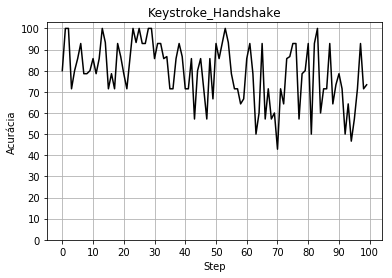

Tempo de Execução:  0.9146506786346436
memory peak:  130584
Acc:  0.520952380952381
Macro-F1:  0.4838557725313432
MCC:  0.38370631569458036
Desvio Padrão:  0.14471333771763642
Numero de atualizações:  10


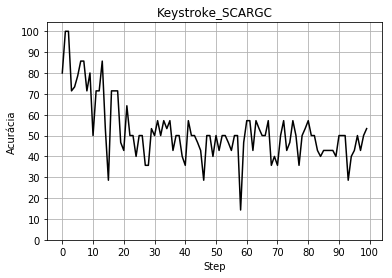

In [9]:
print('Tempo de Execução: ', '1.430009365081787')
print('memory peak: ', '80312')
print('Acc: ', score)
print('Macro-F1: ', '0.7873394112688462')
print('MCC: ', '0.721800952771785')
print('Desvio Padrão: ', std)
print('Numero de atualizações: ', '4')
plots.plotAcc(acc_percent, 100, 'Keystroke_Handshake')

print('Tempo de Execução: ', tempoS)
print('memory peak: ', memS)
print('Acc: ', scoreS)
print('Macro-F1: ', f1S)
print('MCC: ', mccS)
print('Desvio Padrão: ', stdS)
print('Numero de atualizações: ', updtS)
plots.plotAcc(acc_percentScargc, 100, 'Keystroke_SCARGC')